In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
from active_fluid import active_fluid
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.patches as patches
from tqdm import trange
%matplotlib notebook  
#testing git

model initialized


<IPython.core.display.Javascript object>


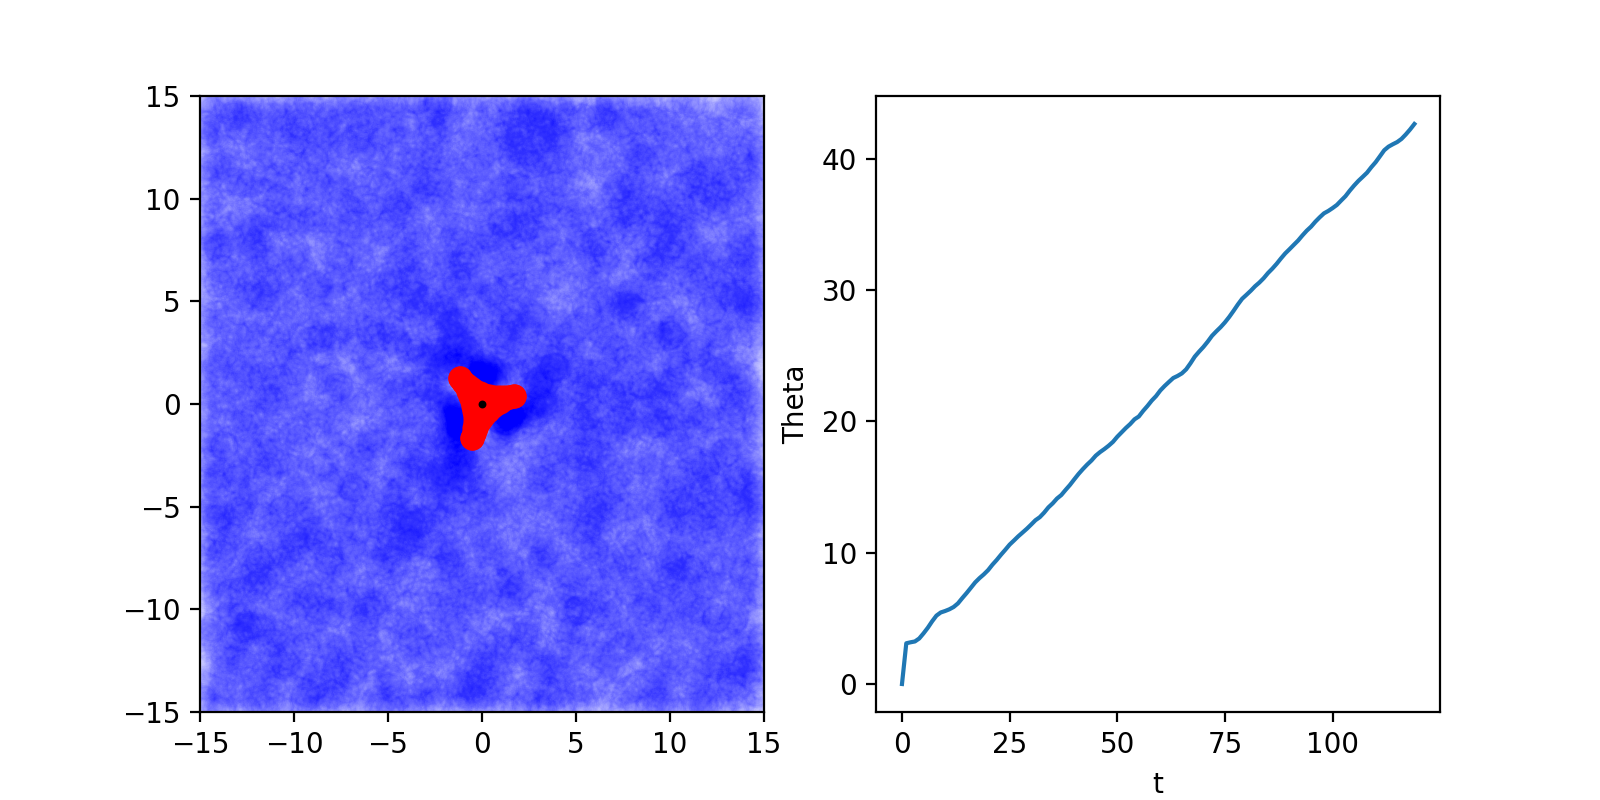

100%|██████████| 100/100 [00:01<00:00, 69.16it/s]


In [14]:
# 0. simulation

AF1 = active_fluid(N_ptcl=20000)
AF1.u = 40
AF1.Dr = 1
AF1.alpha = 1
AF1.lamb = 1*AF1.u
AF1.l_passive = 10
AF1.L = 30
AF1.R = 3
AF1.Rb = 1
AF1.mu_T = 0.1
AF1.mu_R = np.array([30])
# AF1.RA = np.array([AF1.R])/2
AF1.set_zero()


# Visualization
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(8,4))


ax1.set_xlim(-AF1.L/2,AF1.L/2)
ax1.set_ylim(-AF1.L/2,AF1.L/2)

centerX,centerY = AF1.config()

pointX = (AF1.X.reshape(-1,1)+centerX).reshape(-1)
pointY = (AF1.Y.reshape(-1,1)+centerY).reshape(-1)

bath = ax1.scatter(AF1.x, AF1.y,color='blue',alpha=0.2*2000/AF1.N_ptcl,s=100)
body = ax1.scatter(pointX,pointY,color='red',s=300*(AF1.Rb/3)**2*(40/AF1.L)**2)
hinge = ax1.scatter(AF1.X,AF1.Y, c='black',s=30*(AF1.Rb/3)**2)

for i in trange(100):
    AF1.time_evolve()
#     bath.set_offsets(np.hstack((AF1.x,AF1.y)))
#     (pointX,pointY)=AF1.config()
#     body.set_offsets(np.hstack((pointX,pointY)))
# print(np.vstack((AF1.x,AF1.y)).shape)
# print(pointX.shape)
Theta_traj = np.zeros(3000)

def animate(i):
    if (i+1)%100==0:
        print(i+1)
    ax2.clear()
    for _ in range(10):
        AF1.time_evolve()
    


    bath.set_offsets(np.vstack((AF1.x,AF1.y)).T)
    (centerX,centerY)=AF1.config()
    pointX = (AF1.X.reshape(-1,1)+centerX).reshape(-1)
    pointY = (AF1.Y.reshape(-1,1)+centerY).reshape(-1)
    body.set_offsets(np.vstack((pointX,pointY)).T)
    Theta_traj[i]=AF1.Theta
    ax2.plot(Theta_traj[:i])
    ax2.set_xlabel('t')
    ax2.set_ylabel('Theta')

    return body,bath

# update(T)
anim = FuncAnimation(fig,animate,np.arange(1, 2000),interval=3, blit=True)
FFwriter = animation.FFMpegWriter(fps=120)
# plt.show()
# anim.save('rot_test.mp4', writer = FFwriter)

In [6]:
# 1. measure direct friction (fixed w)

In [ ]:
# 2. measure correlation function (linear response version, fixed w)